In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ttest_rel
import statsmodels.stats.multitest as smm
import os

notebook_dir = os.getcwd()  # This returns the current working directory

# Construct the path to the CSV file in the 'results' folder
file_path = os.path.join(notebook_dir, '..', 'results', 'H1-bert-base-uncased-Wic-results.csv')
file_path = os.path.abspath(file_path)

# Load the CSV data
df = pd.read_csv(file_path)


In [4]:
df

,Layer,Activations Shape,Run1 Accuracy,Run1 F1,Run2 Accuracy,Run2 F1,Run3 Accuracy,Run3 F1,Run4 Accuracy,Run4 F1,Run5 Accuracy,Run5 F1
0,0,"torch.Size([5428, 1536])",0.690608,0.690587,0.690608,0.690545,0.674954,0.674954,0.687845,0.687720,0.709024,0.709095
1,1,"torch.Size([5428, 1536])",0.592081,0.591960,0.610497,0.610490,0.586556,0.586510,0.580110,0.580145,0.594843,0.594802
2,2,"torch.Size([5428, 1536])",0.586556,0.586452,0.598527,0.598478,0.567219,0.567263,0.565378,0.565348,0.562615,0.562587
3,4,"torch.Size([5428, 1536])",0.477901,0.309072,0.494475,0.327213,0.488950,0.321129,0.495396,0.328230,0.492634,0.325181
4,5,"torch.Size([5428, 1536])",0.575506,0.575554,0.581952,0.582225,0.584715,0.585097,0.595764,0.595949,0.593923,0.594055
5,6,"torch.Size([5428, 1536])",0.582873,0.583081,0.588398,0.588571,0.593923,0.593955,0.589319,0.589026,0.592081,0.591868
6,7,"torch.Size([5428, 1536])",0.682320,0.682365,0.691529,0.691369,0.686004,0.686017,0.694291,0.694241,0.699816,0.699775
7,9,"torch.Size([5428, 1536])",0.596685,0.596712,0.585635,0.584976,0.597606,0.597742,0.603131,0.603157,0.602210,0.602227
8,10,"torch.Size([5428, 1536])",0.591160,0.590935,0.579190,0.579174,0.594843,0.594882,0.590239,0.589976,0.600368,0.600473
9,11,"torch.Size([5428, 1536])",0.598527,0.598625,0.627993,0.628030,0.583794,0.583273,0.599448,0.599487,0.558011,0.558362


Long-format data:
   Layer  Run  F1_Score
0      0    1  0.685051
1      1    1  0.541956
2      3    1  0.592488
3      4    1  0.573167
4      5    1  0.569947

Summary statistics per layer:
    Layer      mean       std
0       0  0.676049  0.009939
1       1  0.547495  0.015119
2       3  0.582178  0.006504
3       4  0.563455  0.012728
4       5  0.561426  0.009553
5       6  0.576957  0.017076
6       7  0.557785  0.009745
7       8  0.562338  0.012467
8       9  0.559034  0.013039
9      10  0.625161  0.013872
10     11  0.613369  0.011158
11     12  0.569802  0.017662
12     13  0.609538  0.008296
13     14  0.562928  0.014192
14     15  0.600983  0.016376
15     16  0.606376  0.024051
16     17  0.598680  0.010445
17     18  0.601017  0.007030
18     19  0.600079  0.007899
19     20  0.598376  0.007874
20     21  0.587846  0.011640
21     22  0.585174  0.016075
22     23  0.620590  0.008916
23     24  0.618419  0.018403
24     25  0.585152  0.018863
25     26  0.606598  0.0231

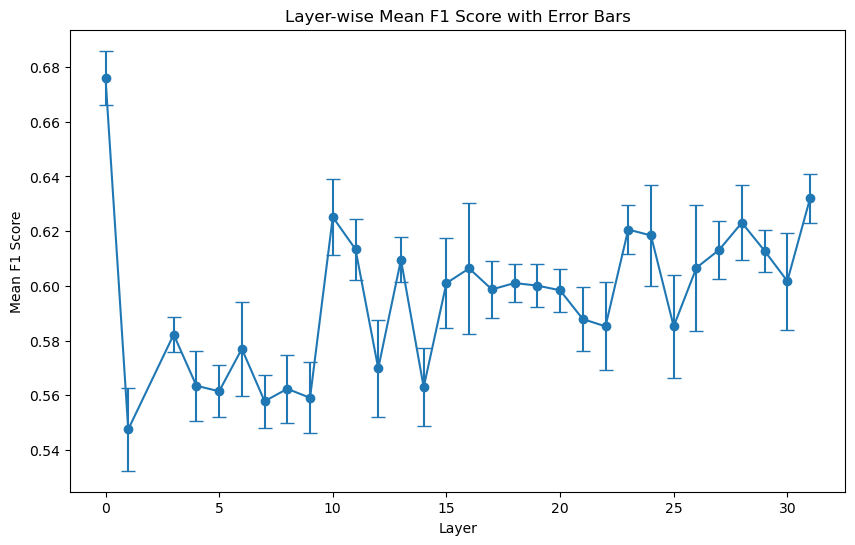


One-Way ANOVA results:
            sum_sq     df          F        PR(>F)
C(Layer)  0.114913   30.0  20.411219  5.878115e-35
Residual  0.023270  124.0        NaN           NaN

Tukey HSD post-hoc test results:
Multiple Comparison of Means - Tukey HSD, FWER=0.05 
group1 group2 meandiff p-adj   lower   upper  reject
----------------------------------------------------
     0      1  -0.1286    0.0  -0.162 -0.0951   True
     0      3  -0.0939    0.0 -0.1273 -0.0605   True
     0      4  -0.1126    0.0  -0.146 -0.0792   True
     0      5  -0.1146    0.0  -0.148 -0.0812   True
     0      6  -0.0991    0.0 -0.1325 -0.0657   True
     0      7  -0.1183    0.0 -0.1517 -0.0849   True
     0      8  -0.1137    0.0 -0.1471 -0.0803   True
     0      9   -0.117    0.0 -0.1504 -0.0836   True
     0     10  -0.0509    0.0 -0.0843 -0.0175   True
     0     11  -0.0627    0.0 -0.0961 -0.0293   True
     0     12  -0.1062    0.0 -0.1397 -0.0728   True
     0     13  -0.0665    0.0 -0.0999 -0.0331  

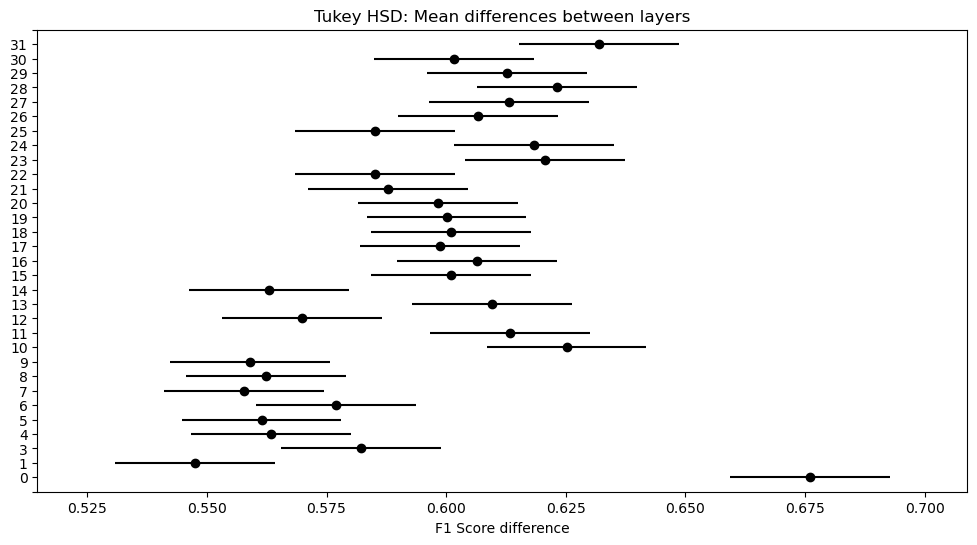

In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# Construct the path to the CSV file in the 'results' folder
file_path = os.path.join(notebook_dir, '..', 'results', 'H1-meta-llama_Llama-2-7b-hf-Wic-results.csv')
file_path = os.path.abspath(file_path)

# Load the CSV data
df = pd.read_csv(file_path)

# The CSV columns are: 
# 'Layer', 'Activations Shape', 'Run1 Accuracy', 'Run1 F1', 'Run2 Accuracy', 'Run2 F1', ... 'Run5 Accuracy', 'Run5 F1'
# We'll focus on the F1 scores.
f1_columns = [col for col in df.columns if 'F1' in col]

# Melt the dataframe so that each run's F1 score becomes its own row
df_long = df.melt(id_vars=['Layer'], value_vars=f1_columns, 
                  var_name='Run', value_name='F1_Score')

# Extract the run number from the 'Run' column (e.g., from 'Run1 F1' extract 1)
df_long['Run'] = df_long['Run'].str.extract(r'Run(\d+)').astype(int)

# Check the transformed data
print("Long-format data:")
print(df_long.head())

# Compute summary statistics per layer
summary = df_long.groupby('Layer')['F1_Score'].agg(['mean', 'std']).reset_index()
print("\nSummary statistics per layer:")
print(summary)

# Visualization: Plot mean F1 vs. Layer with error bars
plt.figure(figsize=(10, 6))
plt.errorbar(summary['Layer'], summary['mean'], yerr=summary['std'], fmt='-o', capsize=5)
plt.xlabel('Layer')
plt.ylabel('Mean F1 Score')
plt.title('Layer-wise Mean F1 Score with Error Bars')
plt.show()

# ---- One-Way ANOVA ----
# Fit an OLS model with Layer as a categorical variable
model = smf.ols('F1_Score ~ C(Layer)', data=df_long).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print("\nOne-Way ANOVA results:")
print(anova_table)

# ---- Tukey's HSD Post-Hoc Test ----
# This test compares the means of all pairs of layers.
tukey = pairwise_tukeyhsd(endog=df_long['F1_Score'], groups=df_long['Layer'], alpha=0.05)
print("\nTukey HSD post-hoc test results:")
print(tukey.summary())

# Visualization: Plotting the Tukey HSD results
tukey.plot_simultaneous(figsize=(12, 6))
plt.title("Tukey HSD: Mean differences between layers")
plt.xlabel("F1 Score")
plt.show()


In [13]:
# Convert the Tukey HSD summary to a DataFrame
tukey_df = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])
display(tukey_df)


,group1,group2,meandiff,p-adj,lower,upper,reject
0,0,1,-0.1286,0.0000,-0.1620,-0.0951,True
1,0,3,-0.0939,0.0000,-0.1273,-0.0605,True
2,0,4,-0.1126,0.0000,-0.1460,-0.0792,True
3,0,5,-0.1146,0.0000,-0.1480,-0.0812,True
4,0,6,-0.0991,0.0000,-0.1325,-0.0657,True
...,...,...,...,...,...,...,...
460,28,30,-0.0214,0.8070,-0.0548,0.0120,False
461,28,31,0.0089,1.0000,-0.0245,0.0423,False
462,29,30,-0.0111,1.0000,-0.0445,0.0223,False
463,29,31,0.0192,0.9268,-0.0142,0.0526,False


In [20]:
import numpy as np
import pandas as pd
import math

# Suppose your Tukey HSD results are in a DataFrame called `tukey_df`
# with columns: ['group1', 'group2', 'meandiff', 'p-adj', 'lower', 'upper', 'reject']
# e.g., tukey_df = pd.DataFrame(tukey._results_table.data[1:], columns=tukey._results_table.data[0])

all_layers = set(tukey_df['group1']).union(tukey_df['group2'])
n_layers = len(all_layers)

def is_better(row, layer):
    """
    Returns True if `layer` is significantly better than the other layer in this row.
    row: a row from tukey_df
    layer: the candidate layer to check
    """
    if not row['reject']:
        return False  # No significant difference
    g1, g2 = row['group1'], row['group2']
    diff = row['meandiff']
    
    # Case 1: layer is group1, meandiff > 0 => group1 is better
    if g1 == layer and diff < 0:
        return True
    
    # Case 2: layer is group2, meandiff < 0 => group2 is better
    if g2 == layer and diff > 0:
        return True
    
    return False

# Count how many layers each layer L is significantly better than
results = {}
for L in all_layers:
    better_count = 0
    for M in all_layers:
        if M == L:
            continue
        # Find the row comparing L and M (either L=M->group1 or group2)
        row = tukey_df[
            ((tukey_df['group1'] == L) & (tukey_df['group2'] == M)) |
            ((tukey_df['group1'] == M) & (tukey_df['group2'] == L))
        ]
        # There should be exactly one matching row
        if row.shape[0] == 1:
            if is_better(row.iloc[0], L):
                better_count += 1
    results[L] = better_count

# Thresholds
# First-Degree: beats all (n_layers - 1)
# Second-Degree: beats >= 75% of the other layers
# Third-Degree: beats >= 50% of the other layers
second_degree_threshold = math.ceil(0.75 * (n_layers - 1))
third_degree_threshold  = math.ceil(0.45 * (n_layers - 1))

first_degree = [L for L, bc in results.items() if bc == (n_layers - 1)]
second_degree = [L for L, bc in results.items() if bc >= second_degree_threshold]
third_degree = [L for L, bc in results.items() if bc >= third_degree_threshold]

print("Significantly better count per layer:", results)
print("First-degree candidates (beats every other layer):", first_degree)
print(f"Second-degree candidates (beats >= 75% of other {n_layers-1} layers):", second_degree)
print(f"Third-degree candidates (beats >= 45% of other {n_layers-1} layers):", third_degree)


Significantly better count per layer: {0: 30, 1: 0, 3: 1, 4: 0, 5: 0, 6: 0, 7: 0, 8: 0, 9: 0, 10: 13, 11: 9, 12: 0, 13: 8, 14: 0, 15: 7, 16: 8, 17: 7, 18: 7, 19: 7, 20: 7, 21: 1, 22: 1, 23: 12, 24: 10, 25: 1, 26: 8, 27: 9, 28: 13, 29: 9, 30: 7, 31: 14}
First-degree candidates (beats every other layer): [0]
Second-degree candidates (beats >= 75% of other 30 layers): [0]
Third-degree candidates (beats >= 45% of other 30 layers): [0, 31]
